In [1]:
import accelerator_environments.envs.ares.ARESlatticeStage3v1_9 as ares
from accelerator_environments.utils import subcell_of
import cheetah
import matplotlib.pyplot as plt
import numpy as np
import ocelot as oc
import ocelot.adaptors.astra2ocelot as oca

initializing ocelot...


In [2]:
cell = subcell_of(ares.cell, "AREASOLA1", "ARMRBSCR1")
segment = cheetah.Segment.from_ocelot(cell)

In [3]:
for element in segment.elements:
    if isinstance(element, cheetah.Screen):
        print(element)

Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=1, name="AREABSCR1")
Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=1, name="ARMRBSCR1")


In [4]:
# segment.AREABSCR1.resoltuion = ?
# segment.AREABSCR1.pixel_size = ?
segment.ARMRBSCR1.resolution = (2448, 2040)
segment.ARMRBSCR1.pixel_size = (3.5488e-6, 2.5003e-6)
segment.ARMRBSCR1.binning = 4

In [5]:
for element in segment.elements:
    if isinstance(element, cheetah.Screen):
        print(element)

Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=1, name="AREABSCR1")
Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=4, name="ARMRBSCR1")


In [8]:
segment.ARMRBSCR1.extent

(-0.0043437312, 0.0043437312, -0.002550306, 0.002550306)

In [10]:
# particles = cheetah.random_particles(n=int(1e+5), sigma_x=175e-6, sigma_y=175e-6, sigma_p=0.0)
p_array_astra = oca.astraBeam2particleArray("ACHIP_EA1_2021.1351.001")
beam = cheetah.Beam.from_ocelot(p_array_astra)

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m


In [11]:
segment.AREAMQZM1.k1 = 4.13 # -0.9964350504414721
segment.AREAMQZM2.k1 = -6.93 # -3.6658567102988844
segment.AREAMQZM3.k1 = 2.99 # 5.203214488709113
# segment.AREAMCVM1.angle = 0
# segment.AREAMCHM1.angle = 1e-3
segment.ARMRBSCR1.is_active = True

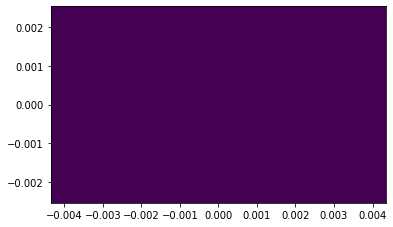

In [12]:
plt.imshow(segment.ARMRBSCR1.reading, interpolation="None", extent=segment.ARMRBSCR1.extent)
plt.show()

In [13]:
segment(beam)

Beam(n=0, mu_x=None, mu_xp=None, mu_y=None, mu_yp=None, sigma_x=None, sigma_xp=None, sigma_y=None, sigma_yp=None, sigma_s=None, sigma_p=None, energy=0)

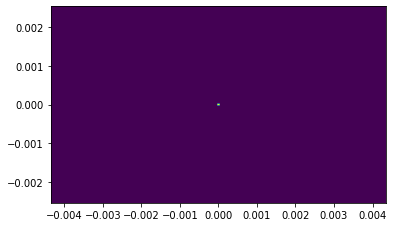

In [14]:
plt.imshow(segment.ARMRBSCR1.reading, interpolation="None", extent=segment.ARMRBSCR1.extent)
plt.show()

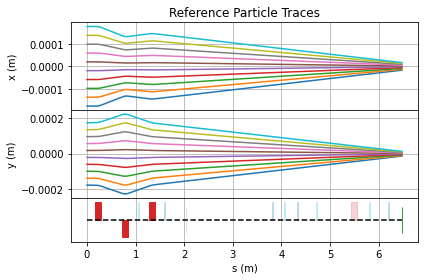

In [15]:
segment.plot_overview(beam=beam)

In [16]:
segment.AREABSCR1.is_active = True

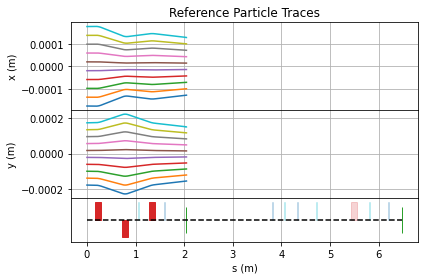

In [17]:
segment.plot_overview(beam=beam)